# Example usage

To use `simplefit` in a project:

# Imports

In [10]:
import simplefit
import altair as alt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
alt.data_transformers.enable('data_server')
alt.renderers.enable('html')
print(simplefit.__version__)

0.1.0


# Sample Data
We will be using the SpotifyFeatures.csv data as an example.

In [11]:
df = pd.read_csv("../tests/data/SpotifyFeatures.csv")

df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


# Clean data 
Loads and cleans the dataset, removes NA rows, strip extra white spaces, etc and returns clean dataframe. Import the cleaner function from the module simplefit.cleaner.

In [12]:
from simplefit.cleaner import cleaner
cleaner(df,lower_case=False)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


# Plot_distributions
Creates numerical distribution plots on either all the numeric columns or the ones provided to it. Import the plot_distributions function from the module simplefit.eda.


In [13]:
from simplefit.eda import plot_distributions, plot_corr, plot_splom

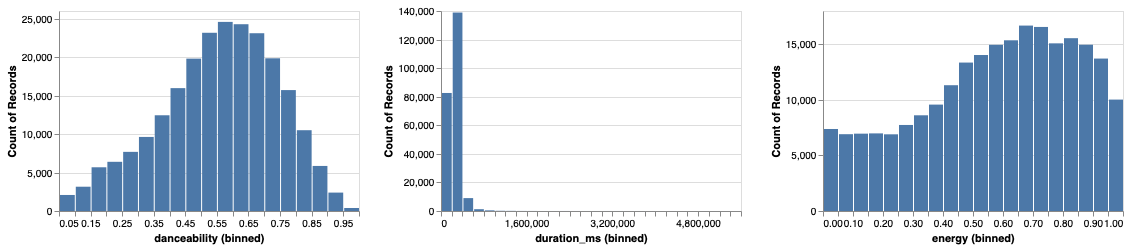

In [14]:
plot_distributions(df, bins = 40, dist_cols=['danceability', 'duration_ms', 'energy'])

# Plot_corr
Creates creates correlation plot for all the columns in the dataframe

# Plot_splom
Creates SPLOM plot for all the numeric columns in the dataframe or the ones passed by the user

# Regressor
Preprocesses the data, fits baseline model(Dummy Regressor) and Ridge with default setup and returns model scores in the form of a dataframe

In [5]:
from simplefit.regressor import regressor
regressor(df, target_col = 'popularity', numeric_feats = ['danceability', 'loudness'], categorical_feats=['genre'], cv=10)


,DummyRegressor,Ridge,RidgeCV,linearRegression
fit_time,0.015774,0.206667,4.636833,0.258613
score_time,0.000299,0.007528,0.006938,0.007074
test_score,-0.353937,0.141713,0.145683,0.143420
train_score,0.000000,0.725900,0.725890,0.725904


# Classifier
Preprocesses the data, fits baseline model(Dummy Classifier) and Logistic Regression with default setup and returns model scores in the form of a dataframe

In [6]:
from simplefit.classifier import classifier

First the classifier is passed with all the inputs

In [7]:
from simplefit.classifier import classifier
classifier(df, target_col = 'popularity', numeric_feats = ['danceability', 'loudness'], categorical_feats=['genre'], cv=10)

KeyboardInterrupt: 

We will now pass no values in the numeric features input to test the function. The function will pick up all numeric type columns

In [ ]:
from simplefit.classifier import classifier
classifier(df, target_col = 'popularity', numeric_feats = [], categorical_feats=['genre'], cv=10)